Objective : Predict whether a person is diabetic or not.

Dataset : https://drive.google.com/file/d/1grzPRHZReG6vJY9O3atGXtsCapyf-VtU/view?usp=sharing

1. Importing necessary libraries ans reading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/diabetes(1).csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


2. Analysing 'Pregnanacies' attribute.

In [5]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

<Axes: xlabel='Pregnancies', ylabel='Count'>

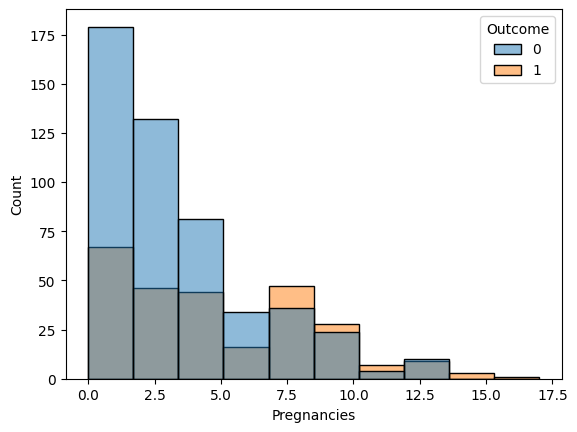

In [10]:
sns.histplot(data=df,x='Pregnancies',bins=10,hue='Outcome')

<Axes: xlabel='Pregnancies', ylabel='count'>

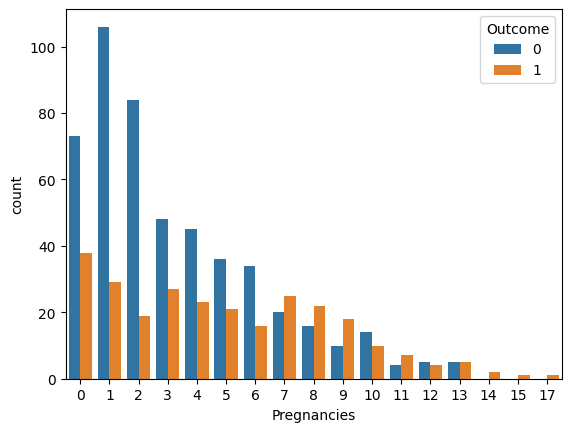

In [9]:
sns.countplot(data=df,x='Pregnancies',hue='Outcome')

From the histplot and countplots above it can be said that as the number of pregnancies increases, the proportion of diabetic outcomes generally increases

3. Replacing 0 with NaN

In [11]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [12]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
df.isna().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

4. Dropping columns with 30% and more of data missing, i.e, SkinThickness and Insulin.

In [14]:
df.drop(['SkinThickness','Insulin'],axis=1,inplace=True)

5. Analysing the distribution of the attributes

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Outcome'}>, <Axes: >, <Axes: >]],
      dtype=object)

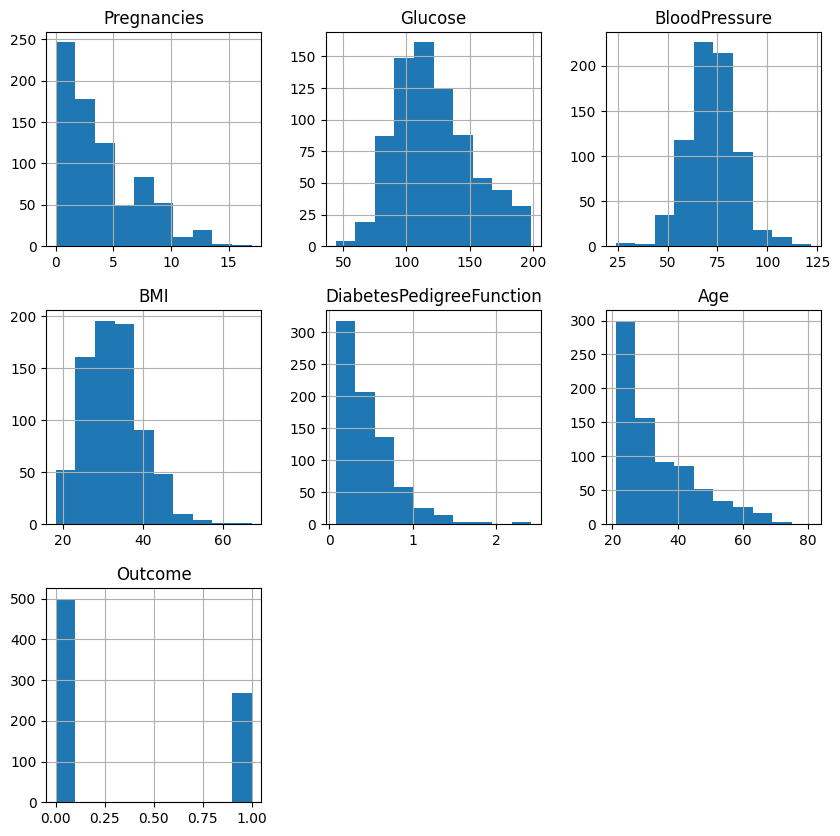

In [15]:
df.hist(figsize=(10,10))

6. Filling in the missing values using median()

In [16]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

7. Checking for nulls

In [17]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

8. Splitting independent and dependent features.

In [18]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

9. Scaling the independent features using StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [20]:
x = sc.fit_transform(x)

In [21]:
x = pd.DataFrame(x)

In [22]:
x.shape

(768, 6)

In [23]:
x.head()

,0,1,2,3,4,5
0,0.639947,0.866045,-0.031990,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,1.549303,5.484909,-0.020496


10. Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

11. Classification using LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [26]:
lr.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred = lr.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc = accuracy_score(y_test,y_pred)
cnf = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(acc)
print(cnf)
print(cr)

0.7532467532467533
[[82 17]
 [21 34]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



12. Classification using Support Vector Machine

In [29]:
from sklearn.svm import SVC

svm = SVC()

In [30]:
svm.fit(x_train,y_train)

SVC()

In [31]:
y_pred_svm = svm.predict(x_test)

In [33]:
acc = accuracy_score(y_test,y_pred_svm)
cnf = confusion_matrix(y_test,y_pred_svm)
cr = classification_report(y_test,y_pred_svm)

print(acc)
print(cnf)
print(cr)

0.7662337662337663
[[83 16]
 [20 35]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



13. Classification using K-Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier

metric_k = []
n = np.arange(3,20)

for k in n:
  classifier = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

14. Choosing the value of 'k'

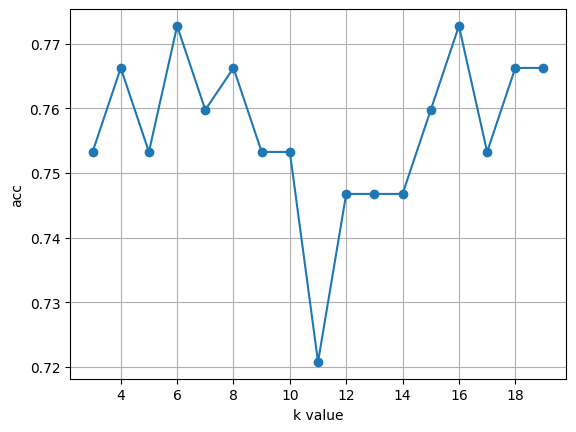

In [35]:
plt.plot(n,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('acc')
plt.grid()
plt.show()

15. Setting k=16 (since it gives maximum accuracy)

In [36]:
classifier = KNeighborsClassifier(n_neighbors = 16,metric = 'euclidean')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [37]:
acc = accuracy_score(y_test,y_pred)
cnf = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(acc)
print(cnf)
print(cr)

0.7727272727272727
[[87 12]
 [23 32]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        99
           1       0.73      0.58      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



16. Naive Bayes Classifier

In [38]:
from sklearn.naive_bayes import GaussianNB

bay = GaussianNB()

bay.fit(x_train,y_train)

GaussianNB()

In [39]:
y_pred_bay = bay.predict(x_test)

In [41]:
acc = accuracy_score(y_test,y_pred_bay)
cnf = confusion_matrix(y_test,y_pred_bay)
cr = classification_report(y_test,y_pred_bay)

print(acc)
print(cnf)
print(cr)

0.7532467532467533
[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154




The accuracy scores of the above classifiers are as follows:

* Logistic Regression: 0.75
* Support Vector Machine: 0.76
* K-Nearest Neighbors (k=16): 0.77
* Naive Bayes: 0.75

Based on these scores, we can conclude that K-Nearest Neighbors with k=16 achieved the highest accuracy in predicting whether a person is diabetic or not. This suggests that the K-Nearest Neighbors algorithm is best suited for this particular dataset and task.